<a href="https://colab.research.google.com/github/Mormyschka/PythonHW/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Работа проводится с датасетом по опросу уровня удовлетворенности сотрудниками работой

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


Требуется выполнить следующие задания:


1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)
3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решением на github и прислать ссылку

# Задание 1

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/Mormyschka/PythonHW/main/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df.shape

(14999, 10)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [100]:
(df.isna().mean() * 100).round(2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

In [101]:
pd.DataFrame(df[['Work_accident', 'left', 'department', 'salary', 'promotion_last_5years']].apply(pd.unique)).rename(columns={0:'Unique values'})

,Unique values
Work_accident,"[0, 1]"
left,"[1, 0]"
department,"[sales, accounting, hr, technical, support, ma..."
salary,"[low, medium, high]"
promotion_last_5years,"[0, 1]"




---

* пустых значений нет
* в категориальных данных ошибок судя по всему также нет

# Задание 2

In [102]:
df.describe().style.background_gradient(cmap='Blues')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [103]:
df.mean()

<ipython-input-103-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [104]:
df.median()

<ipython-input-104-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [105]:
df.mode(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


In [106]:
df.max()

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [107]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [108]:
df.std()

<ipython-input-108-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

# Задание 3

In [109]:
df.corr()

<ipython-input-109-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [153]:
df2 = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


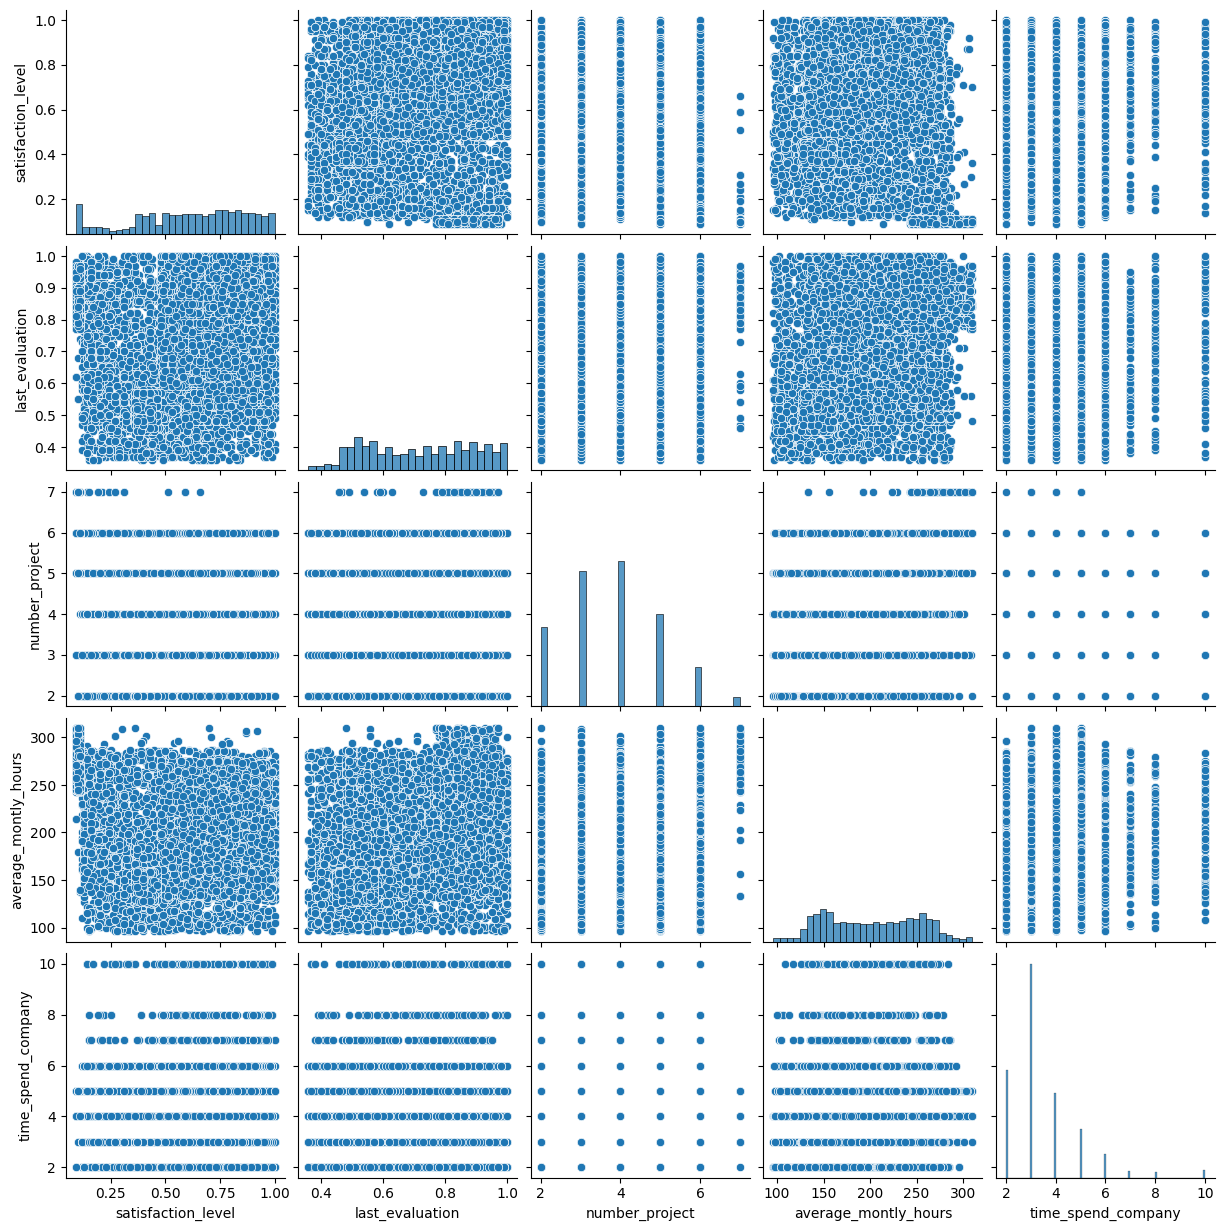

In [152]:
sns.pairplot(df2)

In [154]:
df2.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


In [155]:
df2.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

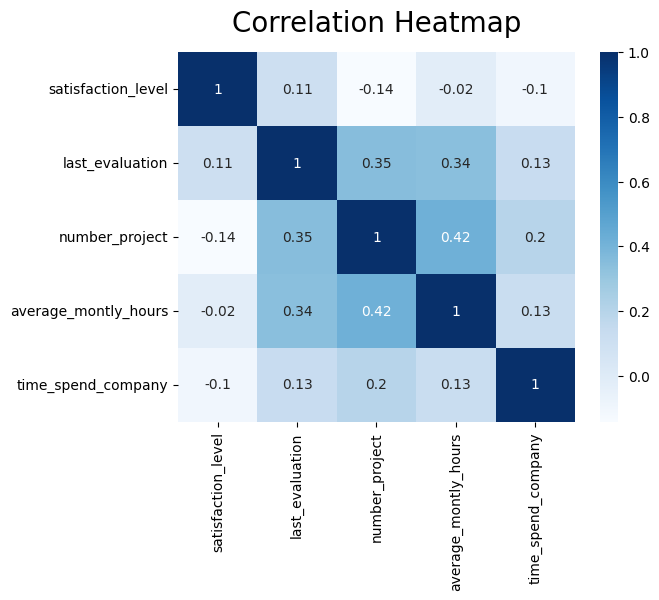

In [156]:
mtx = sns.heatmap(df2.corr(), annot=True, cmap = 'Blues')

mtx.set_title('Correlation Heatmap', \
                    fontdict = {'fontsize':20}, pad = 15)



---
Две самые скоррелированные переменные:

* number_project и average_montly_hours. (Коэф.кор. 0.42)
* number_project и last_evaluation. (Коэф.кор. 0.35)

Две наименее скоррелированные переменные:

* average_monthly_hours и satisfaction_level. (Коэф.кор. -0.02)
* time_spend_company и satisfaction_level. (Коэф.кор. -0.1)


# Задание 4

In [114]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: title={'center': 'Распределение сотрудников по отделам'}, xlabel='Количество сотрудников', ylabel='Отдел'>

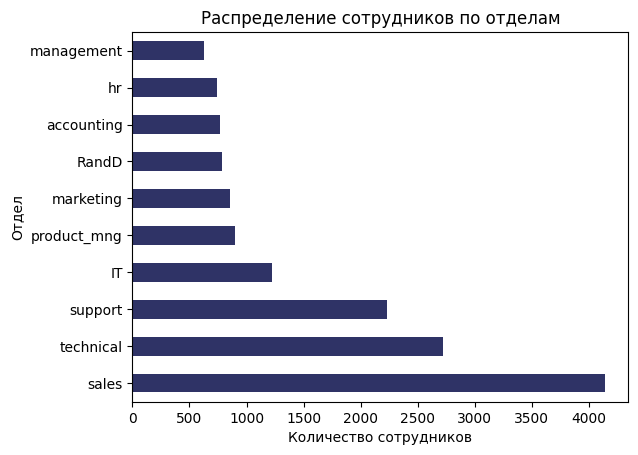

In [115]:
df['department'].value_counts().plot(kind='barh', title='Распределение сотрудников по отделам',
                                 xlabel='Количество сотрудников',
                                 ylabel='Отдел',
                                 color='#2f3366')

# Задание 5

In [116]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

[Text(0.5, 0, 'Зарплата'),
 Text(0, 0.5, 'Количество сотрудников'),
 Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')]

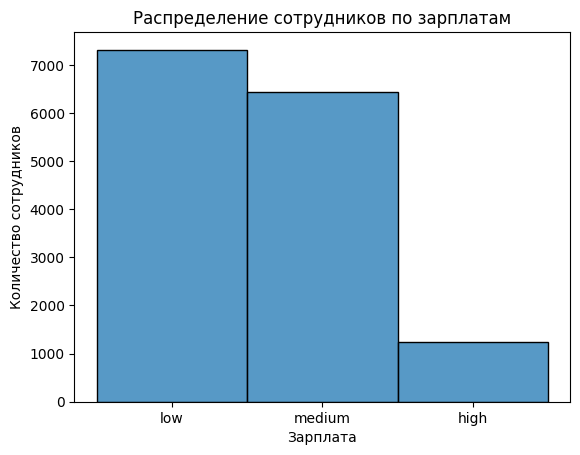

In [117]:
fig2 = sns.histplot(df, x ='salary',stat = 'count', bins = 15)
fig2.set (xlabel='Зарплата',
 ylabel='Количество сотрудников',
 title='Распределение сотрудников по зарплатам')

# Задание 6

In [118]:
by_dep = pd.DataFrame(df.groupby('department')['salary'].value_counts())
by_dep.columns = ['count']
by_dep

count
department  salary       
IT          low       609
            medium    535
            high       83
RandD       medium    372
            low       364
            high       51
accounting  low       358
            medium    335
            high       74
hr          medium    359
            low       335
            high       45
management  high      225
            medium    225
            low       180
marketing   low       402
            medium    376
            high       80
product_mng low       451
            medium    383
            high       68
sales       low      2099
            medium   1772
            high      269
support     low      1146
            medium    942
            high      141
technical   low      1372
            medium   1147
            high      201

Text(0, 0.5, 'Количество сотрудников')

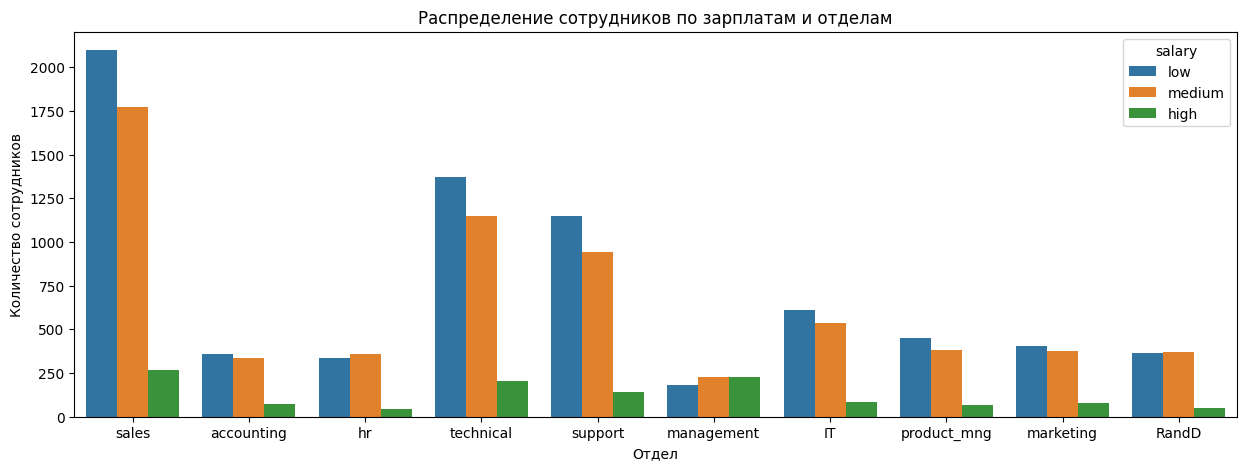

In [119]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'department', hue = 'salary', data = df)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')

Text(0, 0.5, 'Количество сотрудников')

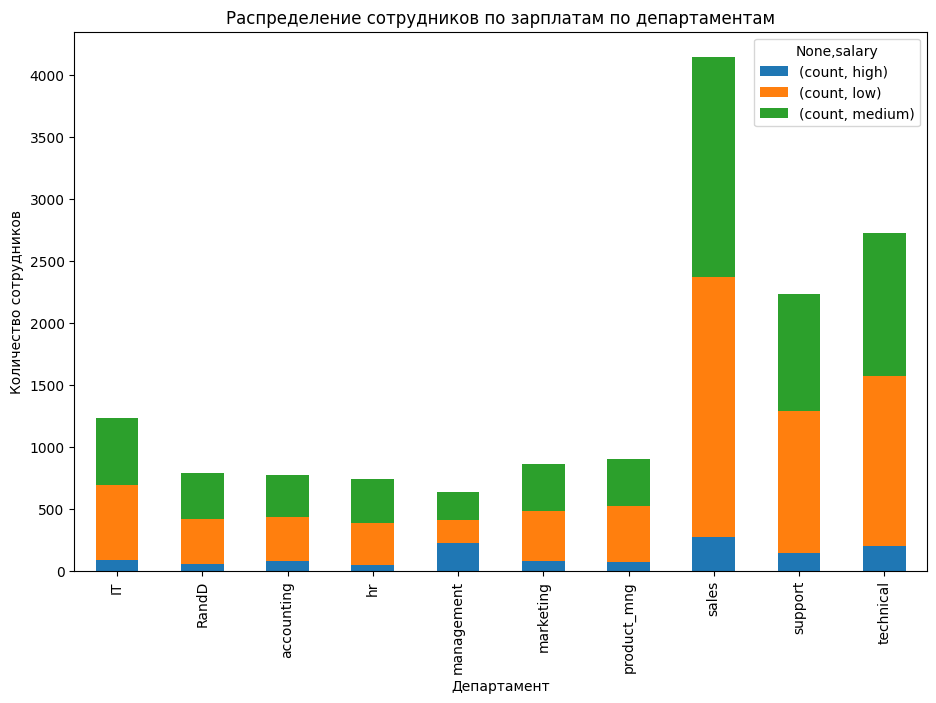

In [120]:
by_dep.unstack().plot(kind='bar' , stacked=True, figsize=(11, 7))
plt.title('Распределение сотрудников по зарплатам по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')

#  Задание 7

Н0 - сотрудники с высоким и низким окладами проводят одинаковое количество времени

Н1 - сотрудники с высоким окладом проводят на работе больше времени

In [121]:
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

In [122]:
stat, p = st.ttest_ind(high_salary, low_salary)

print(f'Статистика = {stat:.5f}, p = {p:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, вероятно, сотрудники с высоким и низким окладами проводят одинаковое количество времени на работе')
else:
    print('Отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени')

Статистика = -0.72887, p = 0.4661023478
Не отклоняем нулевую гипотезу, вероятно, сотрудники с высоким и низким окладами проводят одинаковое количество времени на работе


# Задание 8

Для удобства подсчетов разобьем данные на два датафрейма: уволившиеся сотрудники(df_left) и работающие(df_emp)

In [123]:
df_left = df[df['left'] == 1][['satisfaction_level', 'number_project', 'promotion_last_5years']]
df_left

,satisfaction_level,number_project,promotion_last_5years
0,0.38,2,0
1,0.80,5,0
2,0.11,7,0
3,0.72,5,0
4,0.37,2,0
...,...,...,...
14994,0.40,2,0
14995,0.37,2,0
14996,0.37,2,0
14997,0.11,6,0


In [124]:
df_emp = df[df['left'] == 0][['satisfaction_level', 'number_project', 'promotion_last_5years']]
df_emp

,satisfaction_level,number_project,promotion_last_5years
2000,0.58,4,0
2001,0.82,2,0
2002,0.45,5,0
2003,0.78,5,0
2004,0.49,3,0
...,...,...,...
14206,0.90,3,1
14207,0.74,5,1
14208,0.85,3,1
14209,0.33,3,1




---




Доля сотрудников с повышением за 5 лет

In [139]:
left_1 = len(df_left[df_left['promotion_last_5years'] != 0]) / len(df_left)*100
emp_1 = len(df_emp[df_emp['promotion_last_5years'] != 0]) / len(df_emp)*100

promotion = pd.DataFrame([[left_1, emp_1]],
                         columns=['уволенные', 'работающие'],
                         index=['Доля сотрудников с повышением за последние 5 лет'])
promotion

,уволенные,работающие
Доля сотрудников с повышением за последние 5 лет,0.532064,2.625131




---

Средняя степень удовлетворенности

In [126]:
s_left = df_left['satisfaction_level'].mean()
s_emp = df_emp['satisfaction_level'].mean()

satisfaction = pd.DataFrame([[s_left, s_emp]],
                         columns=['уволенные', 'работающие'],
                         index=['Средняя степень удовлетворенности'])
satisfaction

,уволенные,работающие
Средняя степень удовлетворенности,0.440098,0.66681




---
Среднее количество проектов


In [127]:
p_left = df_left['number_project'].mean()
p_emp = df_emp["number_project"].mean()

project = pd.DataFrame([[p_left, p_emp]],
                         columns=['уволенные', 'работающие'],
                         index=['Среднее количество проектов'])
project

,уволенные,работающие
Среднее количество проектов,3.855503,3.786664


# Задание 9

Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборки

In [128]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
lda = LinearDiscriminantAnalysis()

In [131]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [132]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [133]:
result = pd.DataFrame([y_test.values, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [134]:
accuracy_score(y_test, lda.predict(X_test))

0.7536



---
Точность модели 75%